<a href="https://colab.research.google.com/github/benkee/lotteryDrawWebApp/blob/master/csc2034_MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSC 2034 - Data Science Major Project - Ben Keenan

Explore each of the two datasets by performing aggregations, computing summary statistics (using pandas), and plotting (with e.g. seaborn or matplotlib Pyplot) the data. Specifically, you should be able to:

**1. describe the distribution of wine quality across all samples, separately for red and white. Also compare the quality distributions between reds and whites. Create suitable plots to illustrate.**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_red = pd.read_csv('/content/winequality-red.csv', header=0, sep=";")
df_white = pd.read_csv('/content/winequality-white.csv', header=0,  sep=";")

pred_feat = 'Class'
seed = 10

The datasets have the following attributes

In [3]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df_red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df_white.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


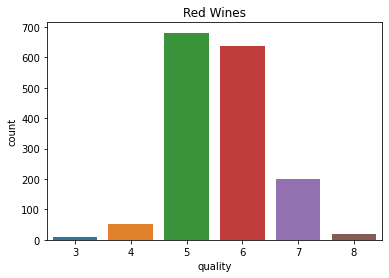

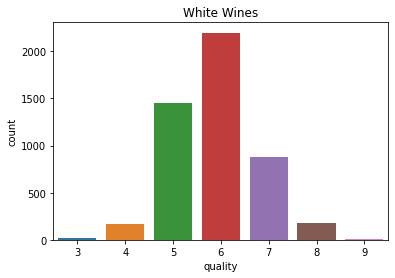

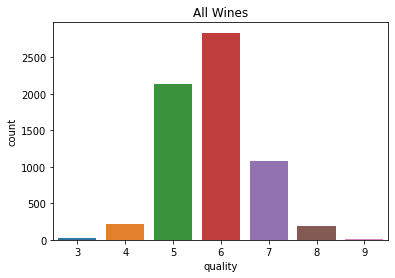

In [7]:
g_red = sns.countplot(x="quality", data=df_red).set_title("Red Wines")
plt.show()

g_white = sns.countplot(x="quality", data=df_white).set_title("White Wines")
plt.show()

frames = [df_red, df_white]
df_all = pd.concat(frames)

g_all = sns.countplot(x="quality", data=df_all).set_title("All Wines")
plt.show()


Above is the distributions of quality in each dataset from top to bottom - red, white and all wines. Overall the distribution across all wines has most quality between 5 and 7, with 6 being the mode quality. Then there are a similar but fewer number of wines with slightly higher (8) and lower (4) qulaity.

Red wines have more lower quality wines than the whites, with the mode for reds being 5 and 6 for whites. Whites also have a larger variation with some wines at a quality of 9, whereas red has no wines of 9 quality.

**2. discretise the alcohol content variables (separately for whites and reds) into (low, mid, high) based on its distribution: low < (average - stddev),  (average - stddev) < mid < (average + stddev), high > (average + stddev). Create a 3-valued "alcohol_cat" variable to represent this.**

In [8]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


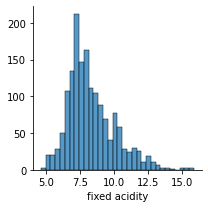

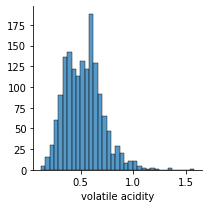

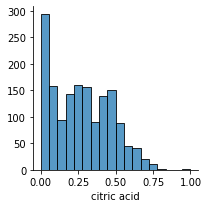

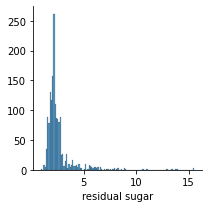

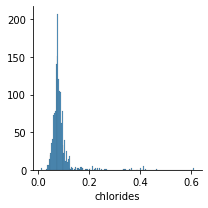

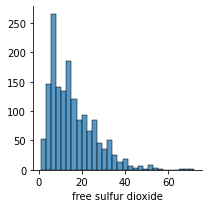

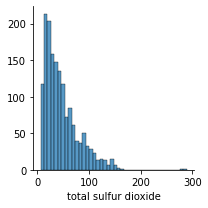

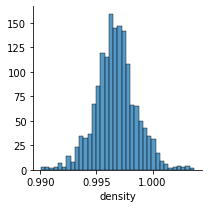

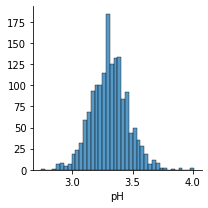

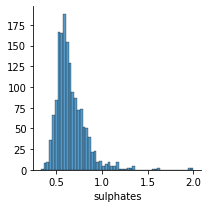

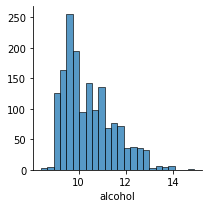

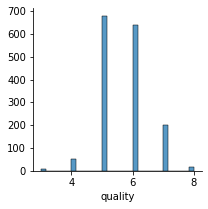

In [9]:
for v in df_red.columns:
  g = sns.FacetGrid(df_red)
  g.map(sns.histplot, v)

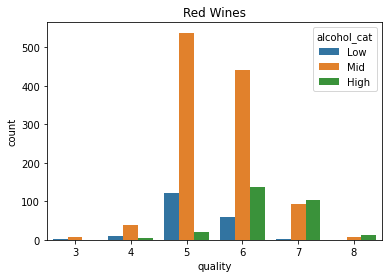

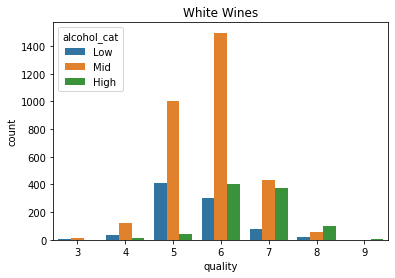

In [10]:
red_std = df_red['alcohol'].std()
red_mean = df_red['alcohol'].mean()

white_std = df_white['alcohol'].std()
white_mean = df_white['alcohol'].mean()

red_bins=[0, red_mean-red_std, red_mean+red_std, df_red['alcohol'].max()]
red_labels = ["Low","Mid","High"]
df_red['alcohol_cat']=pd.cut(df_red['alcohol'], bins=red_bins, labels=red_labels)

g_red_cat = sns.countplot(x="quality", data=df_red, hue = "alcohol_cat").set_title("Red Wines")

plt.show()


white_bins=[0, white_mean-white_std, white_mean+white_std, df_white['alcohol'].max()]
white_labels = ["Low","Mid","High"]
df_white['alcohol_cat']=pd.cut(df_white['alcohol'], bins=white_bins, labels=white_labels)

g_white_cat = sns.countplot(x="quality", data=df_white, hue = "alcohol_cat").set_title("White Wines")

plt.show()



Above is the graphs for the relationship of alcohol content to quality, with red wines at the top and white below. In both wines, the average quality wines are mostly of medium alcohol content. However, at a higher quality, we see that more of the wines have a higher alcohol content.

## How Residual Sugar in Wines affects Quality

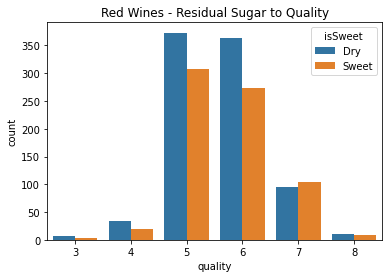

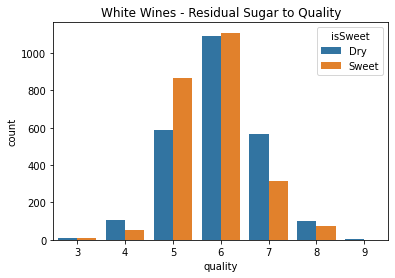

In [14]:
red_bins=[0, df_red['residual sugar'].median() ,df_red['residual sugar'].max()]
red_labels = ["Dry","Sweet"]
df_red['isSweet'] = pd.cut(df_red['residual sugar'], bins=red_bins, labels=red_labels)
g_red_cat = sns.countplot(x="quality", data=df_red, hue = "isSweet").set_title("Red Wines - Residual Sugar to Quality")
plt.show()

white_bins=[0, df_white['residual sugar'].median() ,df_white['residual sugar'].max()]
white_labels = ["Dry","Sweet"]
df_white['isSweet'] = pd.cut(df_white['residual sugar'], bins=white_bins, labels=white_labels)
g_white_cat = sns.countplot(x="quality", data=df_white, hue = "isSweet").set_title("White Wines - Residual Sugar to Quality")
plt.show()

For Red wines, the wines are mixed between Sweet and Dry at all quality levels, however there are more dry wines between 5 and 6 quality. Similarly, for white wines, the sweetness is mixed across all qualities of the wine. However at higher quality, wines tend to be drier.

# Subset Variables Correlation to Quality
## Red Wines

In [15]:
df_red.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## White Wines

In [16]:
df_white.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


## Subset Variables that Correlate to Quality Most

### Red Wines
1.   Alcohol Content
2.   Volatile Acidity
3.   Sulphates

### White Wines
1.   Alcohol Content
2.   Density
3.   Chlorides

##Subset Variables that Correlate to Quality Least

### Red Wines
1.   Residual Sugar
2.   Free Sulfur Dioxide
3.   pH

## White Wines
1.   Free Sulfur Dioxide
2.   Citric Acid
3.   Sulphates

Overall, the subset variables which correlate to quality the most for both wines are alcohol content, volatile acidity and density for both.
